# Time Series

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
dates = pd.date_range(start='1/1/2021', end='6/30/2021')
print(len(dates))
print(dates)

181
DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
               '2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28',
               '2021-06-29', '2021-06-30'],
              dtype='datetime64[ns]', length=181, freq='D')


In [2]:
type(dates[0])

pandas._libs.tslibs.timestamps.Timestamp

In [3]:
# let's create a random variable temperature 

date_df = pd.DataFrame(dates, columns=['Date'])
date_df['Temperature'] = np.random.randint(0,50,size=(len(dates)))
date_df.head()

,Date,Temperature
0,2021-01-01,24
1,2021-01-02,0
2,2021-01-03,25
3,2021-01-04,28
4,2021-01-05,38


In [5]:
#Most of the time, you will need to convert your TimeStamps
# into dates and then set the converted (date type column) as
# the index column. Here is how you can do that

date_df['Date'] = pd.to_datetime(date_df['Date'])
date_df = date_df.set_index('Date')
date_df.head()

,Temperature
Date,
2021-01-01,24
2021-01-02,0
2021-01-03,25
2021-01-04,28
2021-01-05,38


<AxesSubplot:xlabel='Date'>

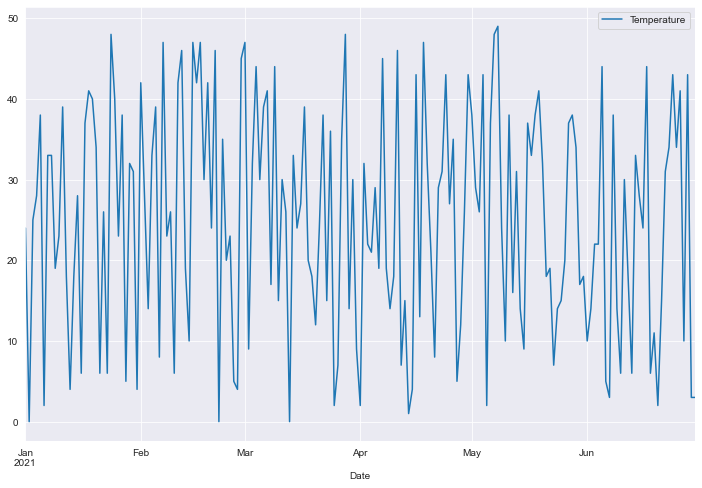

In [6]:
# let's do a time series chart

import seaborn as sns
sns.set_style("darkgrid")
date_df.plot.line( y='Temperature', figsize=(12,8))

In [9]:
import os
get_wd = os.getcwd()
print(get_wd)

c:\Users\ok\Desktop\Python


In [25]:
my_df = pd.read_csv('STOCK_US_XNAS_GOOG.csv')

my_df.head()

,Date,Open,High,Low,Close,Volume
0,04/22/2022,"2,500.00","2,509.04","2,382.81","2,392.28","2,276,660"
1,04/21/2022,"2,587.00","2,606.15","2,493.00","2,498.75","1,507,877"
2,04/20/2022,"2,625.68","2,638.47","2,557.88","2,564.91","1,130,469"
3,04/19/2022,"2,561.54","2,618.08","2,549.03","2,610.62","1,135,965"
4,04/18/2022,"2,548.20","2,574.24","2,531.57","2,559.22","745,860"


In [27]:
# convert Date column to date and index

my_df['Date'] = pd.to_datetime(my_df['Date'])
my_df2 = my_df.set_index('Date')
my_df2.head()


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-22,"2,500.00","2,509.04","2,382.81","2,392.28","2,276,660"
2022-04-21,"2,587.00","2,606.15","2,493.00","2,498.75","1,507,877"
2022-04-20,"2,625.68","2,638.47","2,557.88","2,564.91","1,130,469"
2022-04-19,"2,561.54","2,618.08","2,549.03","2,610.62","1,135,965"
2022-04-18,"2,548.20","2,574.24","2,531.57","2,559.22","745,860"


In [33]:
# Converting all colums to numeric

cols = my_df2.select_dtypes(exclude=['float']).columns
my_df2[cols] = my_df2[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

my_df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2022-04-22 to 2022-03-23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    0 non-null      float32
 1   High    0 non-null      float32
 2   Low     0 non-null      float32
 3   Close   0 non-null      float32
 4   Volume  0 non-null      float32
dtypes: float32(5)
memory usage: 616.0 bytes
